In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [7]:
df = pd.read_csv("covid_19_indonesia_time_series_all.csv")

In [8]:
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Name,Item,Kind,Hidden
0,1/8/2020,ID-JI,Jawa Timur,9,3,1,5,9,5,10,...,0.07,0.12,55.56%,111.11%,NaN,NaN,NaN,NaN,NaN,NaN
1,1/9/2020,ID-JI,Jawa Timur,0,1,23,-24,9,6,33,...,0.02,0.15,66.67%,366.67%,0.00,0.33,NaN,NaN,NaN,NaN
2,1/10/2020,ID-JI,Jawa Timur,0,1,14,-15,9,7,47,...,0.02,0.17,77.78%,522.22%,1.00,1.00,NaN,NaN,NaN,NaN
3,1/11/2020,ID-JI,Jawa Timur,0,3,8,-11,9,10,55,...,0.07,0.25,111.11%,611.11%,1.00,3.00,NaN,NaN,NaN,NaN
4,1/12/2020,ID-JI,Jawa Timur,0,3,1,-4,9,13,56,...,0.07,0.32,144.44%,622.22%,1.00,1.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16278,7/9/2021,ID-SG,Sulawesi Tenggara,124,1,3,120,12447,252,10412,...,0.38,95.62,2.02%,83.65%,0.92,0.50,NaN,NaN,NaN,NaN
16279,7/9/2021,ID-SA,Sulawesi Utara,278,9,9,260,17424,572,15525,...,3.41,216.51,3.28%,89.10%,1.24,9.00,NaN,NaN,NaN,NaN
16280,7/9/2021,ID-SB,Sumatera Barat,718,10,275,433,55675,1259,48840,...,1.81,228.11,2.26%,87.72%,0.93,1.00,NaN,NaN,NaN,NaN
16281,7/9/2021,ID-SS,Sumatera Selatan,341,6,221,114,31147,1569,27088,...,0.73,190.93,5.04%,86.97%,1.15,0.38,NaN,NaN,NaN,NaN


In [9]:
pd.set_option('display.max_columns', None)

# 1. CHI2 TESTING

Chi2 testing digunakan ketika Anda ingin tahu apakah efeknya nyata atau mungkin tidak. Uji CHI Square digunakan untuk menguji dua kelompok data baik variabel independen maupun dependennya berbentuk kategorik atau dapat juga dikatakan sebagai uji proporsi untuk dua peristiwa atau lebih, sehingga datanya bersifat diskrit. Misalnya ingin mengetahui hubungan antara status gizi ibu (baik atau kurang) dengan kejadian BBLR (ya atau tidak)

- H0 = Di suatu populasi yang sama, dua kategorikal variabel tidak berhubungan
- H1 = Di suatu populasi yang sama, dua kategorikal variabel berhubungan

In [33]:
#Sample 10
df_pivot10 = df.groupby(['Location', 'Island']).count()[['Country']].reset_index()
df_pivot10 = df_pivot10.pivot_table(index = 'Location', columns= 'Island', values = 'Country').fillna(0)
chisq, pvalue, df, expected = stats.chi2_contingency(df_pivot10)
print(f'Observed chi2: {chisq:.2f}')
print(f'P-value: {pvalue:.4f}')
df_pivot10

Observed chi2: 94728.00
P-value: 0.0000


Island,Jawa,Kalimantan,Maluku,Nusa Tenggara,Papua,Sulawesi,Sumatera
Location,,,,,,,
Aceh,0.0,0.0,0.0,0.0,0.0,0.0,471.0
Bali,0.0,0.0,0.0,486.0,0.0,0.0,0.0
Banten,491.0,0.0,0.0,0.0,0.0,0.0,0.0
Bengkulu,0.0,0.0,0.0,0.0,0.0,0.0,466.0
DKI Jakarta,496.0,0.0,0.0,0.0,0.0,0.0,0.0
Daerah Istimewa Yogyakarta,481.0,0.0,0.0,0.0,0.0,0.0,0.0
Jambi,0.0,0.0,0.0,0.0,0.0,0.0,477.0
Jawa Barat,495.0,0.0,0.0,0.0,0.0,0.0,0.0
Jawa Tengah,489.0,0.0,0.0,0.0,0.0,0.0,0.0


Di suatu populasi yang sama, dua kategorikal variabel berhubungan

# 2. Fisher's Exact Testing

Uji exact fisher digunakan ketika memiliki dua variabel nominal. Biasanya data yang dimiliki meliputi 2 baris dan 2 kolom. Fisher Exact Testing lebih akurat daripada uji chi-kuadrat untuk data-data yang berjumlah sdikit.

Odds ratio adalah adalah perbandingan dari dua odds. Odds ratio dikhususkan untuk pengukuran pada tabel kontingensi 2×2 atau tabel 2×2 yang merupakan subset dari tabel yang lebih besar.

- H0 = Proporsi relatif dari satu varibel tidak terkait dengan variabel kedua
- H1 = Proporsi relatif dari satu varibel terkait dengan variabel kedua

# 3. Anova Testing

Analisis one way Anova atau uji anova satu faktor pada dasarnya bertujuan untuk membandingkan nilai rata-rata yang terdapat pada variabel terikat di semua kelompok yang dibandingkan. Nilai masing-masing kelompok dilihat berdasarkan pada variabel bebas yang berskala kategori. Analisis anova peruluasan dari teknik independent sample t-test. Anova dapat digunakan untuk kelompok yang berjumlah lebih dari 2 serta mempunyai nilai rata-rata yang sama ataupun berbeda Akan digunakan untuk menganalisis varian untuk menguji hipotesis:

- H0 : Memiliki varian yang sedikit berbeda, bisa dilakukan lebih dari 2 kelompok
- H1 : Memiliki varian yang sangat berbeda, bisa dilakukan lebih dari 2 kelompok

In [28]:
fvalue, pvalue = stats.f_oneway(df[df.Province == 'Jawa Timur']['New Deaths per Million'],
                                df[df.Province == 'Sumatera Barat']['New Deaths per Million'],
                                df[df.Province == 'Sulawesi Tenggara']['New Deaths per Million'],
                                df[df.Province == 'Sumatera Utara']['New Deaths per Million'])
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.0000


Memiliki varian yang sangat berbeda, bisa dilakukan lebih dari 2 kelompok

# 4. Correlation Testing

Korelasi testing ini untuk mengetahui kolom numerik mana yang berhubungan dengan kolom numerik yang lain. Jika:

Korelasi positif = hubungan antardua kolom / variabel itu menunjukkan arah yang sama, jika x mengalamin kenaikan atau pertambahan, akan diikuti pula dengan kenaikan variabel y
Korelasi negatif = hubungan antardua kolom / variabel itu menunjukkan arah yang sama, jika x mengalamin kenaikan atau pertambahan, akan diikuti pula dengan penurunan variabel y
0 : Tidak ada hubungan
0.01 - 0.09 : Hubungan Kurang Berarti
0.10 - 0.29 : Hubungan lemah
0.30 - 0.49 : Hubungan modereat
0.50 - 0.69 : Hubungan Kuat
0.70 - 0.89 : Hubungan Sangat Kuat
lebih dari 0.90 : Hubungan mendekati sempurna

In [22]:
df.corr()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Growth Factor of New Cases,Growth Factor of New Deaths,Name,Item,Kind,Hidden
New Cases,1.000000,0.923413,0.919865,0.695185,0.827997,0.807272,0.805727,0.933459,NaN,0.618121,0.629045,0.622613,0.625285,0.652443,0.602532,0.632065,0.137188,-0.038393,-0.010695,0.315949,0.223450,0.189597,0.231301,-0.015505,0.021444,NaN,NaN,NaN,NaN
New Deaths,0.923413,1.000000,0.897754,0.545669,0.824963,0.843342,0.803482,0.912796,NaN,0.680229,0.687078,0.684855,0.686818,0.695436,0.657058,0.696282,0.069342,-0.036186,-0.020363,0.173185,0.139719,0.246364,0.200739,-0.023187,0.110032,NaN,NaN,NaN,NaN
New Recovered,0.919865,0.897754,1.000000,0.357649,0.861992,0.845108,0.841516,0.946255,NaN,0.678694,0.690833,0.683334,0.686769,0.717312,0.661670,0.693295,0.151009,-0.042981,-0.009048,0.271253,0.223854,0.214072,0.234823,-0.023816,0.070552,NaN,NaN,NaN,NaN
New Active Cases,0.695185,0.545669,0.357649,1.000000,0.390104,0.369550,0.374659,0.487095,NaN,0.223634,0.227681,0.225807,0.226038,0.239517,0.218176,0.229922,0.053724,-0.012747,-0.008254,0.261716,0.126029,0.055698,0.121548,0.007041,-0.082365,NaN,NaN,NaN,NaN
Total Cases,0.827997,0.824963,0.861992,0.390104,1.000000,0.976977,0.998731,0.897651,NaN,0.654473,0.664862,0.658514,0.661698,0.680294,0.638149,0.666838,0.135452,-0.033317,-0.007843,0.184864,0.273385,0.133745,0.297951,-0.023634,0.020926,NaN,NaN,NaN,NaN
Total Deaths,0.807272,0.843342,0.845108,0.369550,0.976977,1.000000,0.973320,0.885860,NaN,0.688026,0.695352,0.692633,0.695179,0.703440,0.663925,0.704165,0.074936,-0.031581,-0.022770,0.118849,0.189370,0.117646,0.273663,-0.025555,0.018615,NaN,NaN,NaN,NaN
Total Recovered,0.805727,0.803482,0.841516,0.374659,0.998731,0.973320,1.000000,0.874513,NaN,0.636417,0.647337,0.640278,0.643908,0.663982,0.620548,0.648605,0.142470,-0.034602,-0.007866,0.183036,0.284770,0.132093,0.307283,-0.023061,0.019523,NaN,NaN,NaN,NaN
Total Active Cases,0.933459,0.912796,0.946255,0.487095,0.897651,0.885860,0.874513,1.000000,NaN,0.727908,0.733074,0.732918,0.731827,0.744129,0.711658,0.739310,0.073368,-0.018316,-0.002519,0.197475,0.162255,0.136951,0.185505,-0.025372,0.031602,NaN,NaN,NaN,NaN
City or Regency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Regencies,0.618121,0.680229,0.678694,0.223634,0.654473,0.688026,0.636417,0.727908,NaN,1.000000,0.991437,0.998129,0.994245,0.996354,0.985316,0.980077,-0.066520,0.020065,0.081162,-0.030618,-0.036485,-0.007190,-0.008595,-0.021545,0.003918,NaN,NaN,NaN,NaN


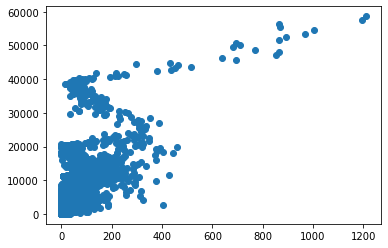

In [25]:
plt.scatter(df['New Cases per Million'],df['Total Cases per Million'])

Artinya memiliki korelasi yang kuat diantara 2 kololm karena berjalan berdapingan, semakin besar x, besar juga y nya

# 5. T Testing

Setelah melakukan Uji Anova maka bisa juga dilakukan secara t-Test. Kedua uji tersebut sama-sama betujuan untuk membandingkan nilai rata-rata. Perbedaan yang mendasar adalah dimana uji independent sample t-test sendiri digunakan untuk membnadingkan nilai rata-rata variabel pada dua kelompok saja. t-Testing ini dijalankan untuk menguji kebenaran atau kepalsuan hipotesis nol yang diambil secara random dari populasi yang sama

- H0 : Memiliki varian yang sedikit berbeda, hanya dilakukan 2 kelompok
- H1 : Memiliki varian yang sangat berbeda, hanya dilakukan 2 kelompok

In [20]:
#Sample 1
res = stats.ttest_ind(df[df.Province == 'Jawa Timur']['New Cases'],
                      df[df.Province == 'Sumatera Barat']['New Cases'],
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.0000


Memiliki varian yang sangat berbeda

# 6. Paired t-Test (Uji t berpasangan)

Uji Paired Sample T Test adalah pengujian yang digunakan untuk membandingkan selisih dua mean dari dua sampel yang berpasangan dengan asumsi data berdistribusi normal. Sampel berpasangan berasal dari subjek yang sama, setiap variabel diambil saat situasi dan keadaan yang berbeda. Uji ini juga disebut Uji T.

Uji Paired Sample T Test menunjukkan apakah sampel berpasangan mengalami perubahan yang bermakna. Hasil uji Paired Sample T Test ditentukan oleh nilai signifikansinya. Nilai ini kemudian menentukan keputusan yang diambil dalam penelitian.

- H0 = Menunjukkan adanya perbedaan yang signifikan antara variabel awal dengan variabel akhir. Ini menunjukkan terdapat pengaruh yang bermakna terhadap perbedaan perlakuan yang diberikan pada masing-masing variabel.
- H1 = Menunjukkan tidak terdapat perbedaan yang signifikan antara variabel awal dengan variabel akhir. Ini menunjukkan tidak terdapat pengaruh yang bermakna terhadap perbedaan perlakukan yang diberikan pada masing-masing variabel

t-statistic:76.0990807433269
p-value:0.000000


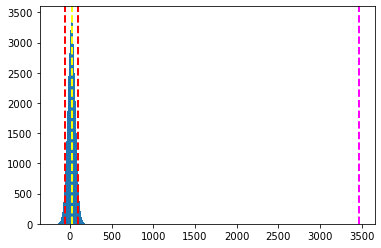

In [12]:
np.random.seed(123)
midTerm = df['New Cases per Million']
endTerm = df['Total Cases per Million']

# Paired (related) test
t,p = stats.ttest_rel(endTerm, midTerm)
# ttest_rel is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(midTerm.mean(), midTerm.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, midTerm.mean(), midTerm.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() + t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

Menunjukkan tidak terdapat perbedaan yang signifikan antara variabel awal dengan variabel akhir. Ini menunjukkan tidak terdapat pengaruh yang bermakna terhadap perbedaan perlakukan yang diberikan pada masing-masing variabel